# Shelter Animal Outcomes - Random Forest Classifier

## Importing all the required libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

## Required for the Graphs

In [2]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

## Reading the Dataset

In [3]:
df = pd.read_csv('../../data/train_V2.csv')
df[:5]
print(df.shape)

(26729, 48)


## Creating Feature Matrix and Label Vector

In [4]:
cols = list(df.columns)[1:]
# cols

In [5]:
# features = cols[1:]
features = ['Cat', 'Dog', 'Male', 'Female', 'Intact', 'Spayed', 'Neutered', 'Age', 'Mixed', 'Purebred']
X = df[features]

In [6]:
label = cols[0]
y = df[label]

## Encoding the Label Vector

In [7]:
# Change all categorical data into 
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)

## Finding the best parameters for Random Forest

In [8]:
# param_grid = { 
#     'n_estimators': [200, 500],
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

# CV_rfc = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv= 5)

# CV_rfc.fit(X_train, y_train)

# CV_rfc.best_params_ 
# {'criterion': 'entropy',
#  'max_depth': 7,
#  'max_features': 'auto',
#  'n_estimators': 200}

## Splitting the dataset into training/testing sets

In [9]:
rf_classifier = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, max_depth=7, criterion='entropy')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Fitting the data and calculating an accuracy

In [10]:
rf_classifier.fit(X_train, y_train)
rf_predict = rf_classifier.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predict)
print(rf_accuracy)

0.6383360766122999


## Graphing a Decision Tree

In [11]:
estimator = rf_classifier.estimators_[5]

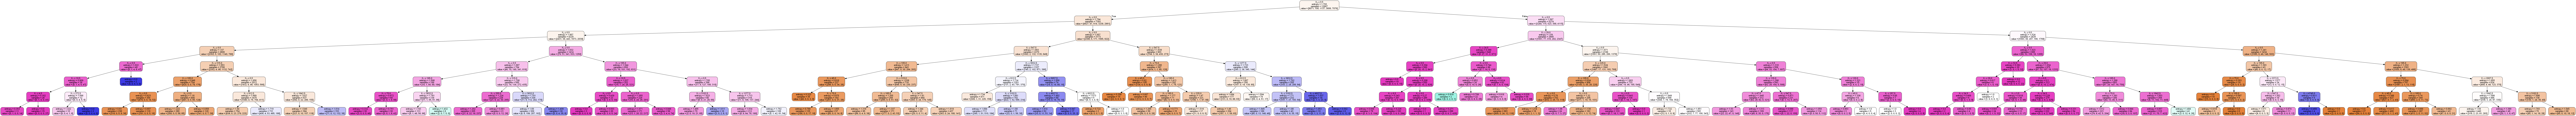

In [12]:

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

# Export as dot file
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Implementing PCA with Random Forest

In [13]:
from sklearn.decomposition import PCA
from sklearn import preprocessing

rf_classifier = RandomForestClassifier(random_state=42, max_features='auto', n_estimators=200, max_depth=7, criterion='entropy')
X_scaled = preprocessing.scale(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)

c:\users\icano3\cs\cs4661_sao\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """


## Choosing K Components

In [14]:
# Creating a PCA with 3 components
k = 5
my_pca = PCA(n_components=k)

## Normalizing the dataset

In [15]:
X_train_new = my_pca.fit_transform(X_train)
X_test_new = my_pca.transform(X_test)

In [16]:
rf_classifier.fit(X_train_new, y_train)
# use the model to predict the new testing set
rf_predict = rf_classifier.predict(X_test_new)

rf_accuracy = accuracy_score(y_test, rf_predict)
print(rf_accuracy)

0.637139009426904


## Graphing a Decision Tree

In [17]:
estimator = rf_classifier.estimators_[5]

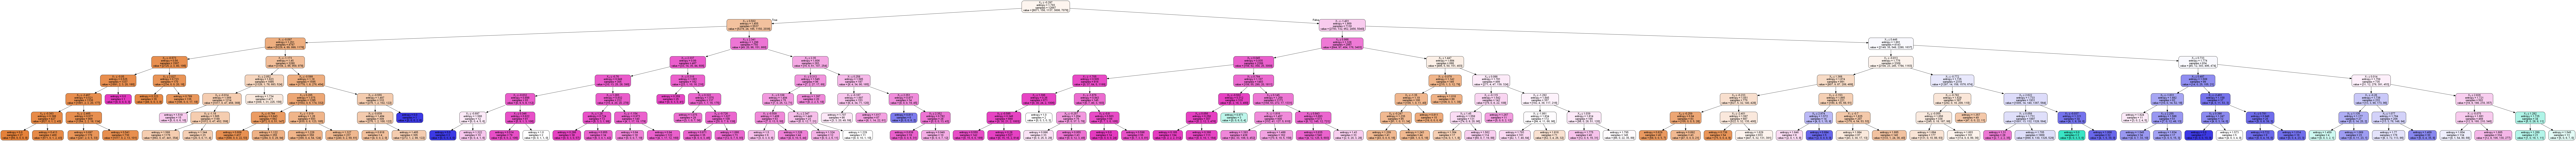

In [18]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()

# Export as dot file
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())